# HomeWork 4
Adam Kulas  
watiam: akulas  
student number: 20302000  

References:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from IPython.display import display, HTML
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')


## Data Exploration

In [3]:
display(data.head())
display(data.dtypes)
display(data.describe())


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Prepare the data

The KNN algorithm calculates distance between the features in order to group the data. This is a problem with categorical fields because they must be converted to a number where distance between the labels correlate with the other numeric features in the set. For example education could be converted to a number representing amount of education achieved. This could be a reasonable conversion because you would expect addtional education to be advantagous to an individial's situation. However, grouping "contact" could be an issue because converting "celluar" to a numeric value may not provide any reasonable information in terms of euclidean distance between observations.

In [4]:
# set all categorical columns to category data type
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data[categorical_cols] = data[categorical_cols].astype('category')

# set all binary columns to integer values of 0 or 1
binary_cols = ['default', 'housing', 'loan', 'y']
d = {'yes': 1, 'no': 0, 'unknown': np.nan}
for col in binary_cols:
    data[col] = data[col].map(d)
#     data[col].astype(int)
    
display(data.dtypes)
display(data.head())

age                  int64
job               category
marital           category
education         category
default            float64
housing            float64
loan               float64
contact           category
month             category
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                  float64
dtype: object

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


In [5]:
# find all Nan observations and drop them

print('before:\n', data.isna().sum())
data = data.dropna()
print('\nafter:\n', data.isna().sum())

before:
 age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

after:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Duration column should be dropped because it gives inforamtion on the target. This could affect the predictive accuracy of the model

In [6]:
data = data.drop('duration', 1)

In [7]:
#split data into X (input data) and y (target) 
X = data.iloc[:,:-1].values
y = data['y'].values

In [8]:
data.dtypes

age                  int64
job               category
marital           category
education         category
default            float64
housing            float64
loan               float64
contact           category
month             category
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                  float64
dtype: object

In [9]:
# select only the numeric features
data_numeric = data.select_dtypes(exclude=['category', 'object'])
display(data_numeric.head())

X_numeric = data_numeric.iloc[:,:-1].values

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.0,0.0,0.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,0.0,1.0,0.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0.0,0.0,0.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,0.0,0.0,1.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
6,59,0.0,0.0,0.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0


### Z-Score normalization

In [10]:
# calculating the z-score normalization using sklearn
data_numeric_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data_numeric))
data_numeric_zscore.columns = data_numeric.columns
display(data_numeric_zscore.describe())
display(data_numeric_zscore.head())

X_numeric_normalized = data_numeric_zscore.iloc[:,:-1].values

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04,3.182800e+04
mean,3.654792e-16,-1.101394e-15,-2.242122e-14,2.192795e-15,-1.627140e-14,1.012463e-13,-9.604831e-14,2.474572e-13,2.340856e-13,1.021414e-14,2.344308e-14,-2.026961e-13,1.091569e-13
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-2.113463e+00,-9.709043e-03,-1.085179e+00,-4.304789e-01,-5.603639e-01,-4.660317e+00,-3.735121e-01,-2.052653e+00,-2.252044e+00,-2.129028e+00,-1.577957e+00,-2.593564e+00,-3.845860e-01
25%,-7.774991e-01,-9.709043e-03,-1.085179e+00,-4.304789e-01,-5.603639e-01,2.159367e-01,-3.735121e-01,-1.062920e+00,-7.648687e-01,-4.434579e-01,-1.197195e+00,-8.046869e-01,-3.845860e-01
50%,-2.049434e-01,-9.709043e-03,9.215069e-01,-4.304789e-01,-1.915848e-01,2.159367e-01,-3.735121e-01,7.309711e-01,-1.369880e-01,-2.561724e-01,7.896062e-01,4.085811e-01,-3.845860e-01
75%,6.538903e-01,-9.709043e-03,9.215069e-01,-4.304789e-01,1.771942e-01,2.159367e-01,-3.735121e-01,9.165461e-01,7.988776e-01,8.675407e-01,8.484869e-01,8.983770e-01,-3.845860e-01
max,5.329762e+00,1.029968e+02,9.215069e-01,2.322994e+00,1.492836e+01,2.159367e-01,1.279582e+01,9.165461e-01,2.114194e+00,2.844443e+00,8.955914e-01,8.983770e-01,2.600199e+00


,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.608150,-0.009709,-1.085179,-0.430479,-0.560364,0.215937,-0.373512,0.730971,0.798878,0.867541,0.790167,0.408581,-0.384586
1,-0.204943,-0.009709,0.921507,-0.430479,-0.560364,0.215937,-0.373512,0.730971,0.798878,0.867541,0.790167,0.408581,-0.384586
2,0.081335,-0.009709,-1.085179,-0.430479,-0.560364,0.215937,-0.373512,0.730971,0.798878,0.867541,0.790167,0.408581,-0.384586
3,1.608150,-0.009709,-1.085179,2.322994,-0.560364,0.215937,-0.373512,0.730971,0.798878,0.867541,0.790167,0.408581,-0.384586
4,1.894428,-0.009709,-1.085179,-0.430479,-0.560364,0.215937,-0.373512,0.730971,0.798878,0.867541,0.790167,0.408581,-0.384586


## K Nearest Neighbors Model

In [11]:

# simple prediction test with unnormalized data
np.random.seed(133)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'KNN prediction with unnormalized data: {score:.3f}')

#simple prediction test with normalized data
np.random.seed(133)
X_train, X_test, y_train, y_test = train_test_split(X_numeric_normalized, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'KNN prediction with normalized data: {score:.3f}')

KNN prediction with unnormalized data: 0.871
KNN prediction with normalized data: 0.873


The KNN model above is run using all numerical fields including the binary fields. Interestingly, the model seems to perform slightly better with normalized data.  
Next we will create a function to cross validate the models using KFold cross validation. This way we can test different inputs and tune the hyperparameters

### Create function to cross validate the model

In [12]:
from sklearn.model_selection import KFold
def cross_validate_knn(X, y, n_neighbors=3, seed=123):
    #define 10-fold cross validation test harness
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cvscores = []
    for train, test in kfold.split(X, y):
        #create model
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
        #train model
        model = neigh.fit(X[train], y[train])
        #evaluate the model
        score = model.score(X[test], y[test])
        cvscores.append(score)
    return (np.mean(cvscores), np.std(cvscores))

### Evaluate KNN using all numerical data

In [13]:
result = cross_validate_knn(X_numeric_normalized, y)
print(f'KNN with all numerical fields and n_neighbors=3 performs with {result[0]:.3f} accuracy and {result[1]:.2f} standard deviation')

KNN with all numerical fields and n_neighbors=3 performs with 0.869 accuracy and 0.01 standard deviation


### Try different values of K to find optimal hyper parameter value

In [14]:
acc_by_k = []
for k in range(1,20):
    result = cross_validate_knn(X_numeric_normalized, y, n_neighbors=k)
    acc_by_k.append(result[0])
    print(k, result[0])

1 0.831657673060036
2 0.8746388685333955
3 0.8694546551022452
4 0.8760841052788096
5 0.8741675755057162
6 0.8790690071962676
7 0.8780949252520609
8 0.8795087056019042
9 0.8792887872858502
10 0.8811425326209535
11 0.8805141254618493
12 0.8819595201803738
13 0.8817081652153875
14 0.883624724608439
15 0.8825249750550584
16 0.8837503329776965
17 0.8828391440779928
18 0.8837189259487224
19 0.8834989878860295


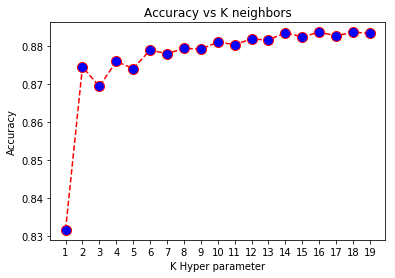

In [15]:
fig, ax = plt.subplots()
ax.plot(range(1, 20), acc_by_k, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
ax.set_xlabel('K Hyper parameter')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs K neighbors')
ax.set_xticks(list(range(1,20)))
plt.show()

Generally it seems performance increases with more neighbors

### Try all combinations of 2 features to see which two featuers provide the highest predictive power

In [16]:
import itertools

# get all feature column names
features = data_numeric.columns[:-1]

KNN_predictions = []
# loop to find which two features provide the best predictive power
for features_2D in itertools.combinations(features,2):
    # create KNN model and cross validate with 2 features    
    result = cross_validate_knn(data_numeric_zscore[list(features_2D)].values, y, n_neighbors=6)
    KNN_predictions.append((result[0], features_2D)) 
KNN_predictions.sort(key=lambda tup: tup[1], reverse=True)

In [17]:
KNN_predictions.sort(key=lambda tup: tup[0], reverse=True)
_ = [print(x) for x in KNN_predictions]

(0.8807970651755583, ('pdays', 'emp.var.rate'))
(0.8798544100069646, ('housing', 'pdays'))
(0.8797287522711104, ('age', 'pdays'))
(0.8793205102610446, ('pdays', 'cons.price.idx'))
(0.8789433494604133, ('loan', 'pdays'))
(0.8783776674993824, ('campaign', 'pdays'))
(0.87818919570558, ('pdays', 'previous'))
(0.8768696561892975, ('pdays', 'cons.conf.idx'))
(0.8766183308442697, ('pdays', 'euribor3m'))
(0.8753930124149092, ('default', 'pdays'))
(0.8740106292207207, ('pdays', 'nr.employed'))
(0.872879492385005, ('loan', 'euribor3m'))
(0.8727222400271082, ('emp.var.rate', 'euribor3m'))
(0.8723766343552416, ('euribor3m', 'nr.employed'))
(0.8723137116907802, ('cons.conf.idx', 'euribor3m'))
(0.8719995821611235, ('campaign', 'previous'))
(0.8718109326475721, ('cons.price.idx', 'euribor3m'))
(0.8716225299670054, ('loan', 'previous'))
(0.8715597850222929, ('age', 'previous'))
(0.8713710170289088, ('emp.var.rate', 'nr.employed'))
(0.8712141102371908, ('housing', 'previous'))
(0.8711512566859649, ('lo

We can see that 'emp.var.rate' and 'pdays' are the two highest performing features.

### Create plot of best features and worst features

### Best 2 Performing Features emp.var.rate and pdays

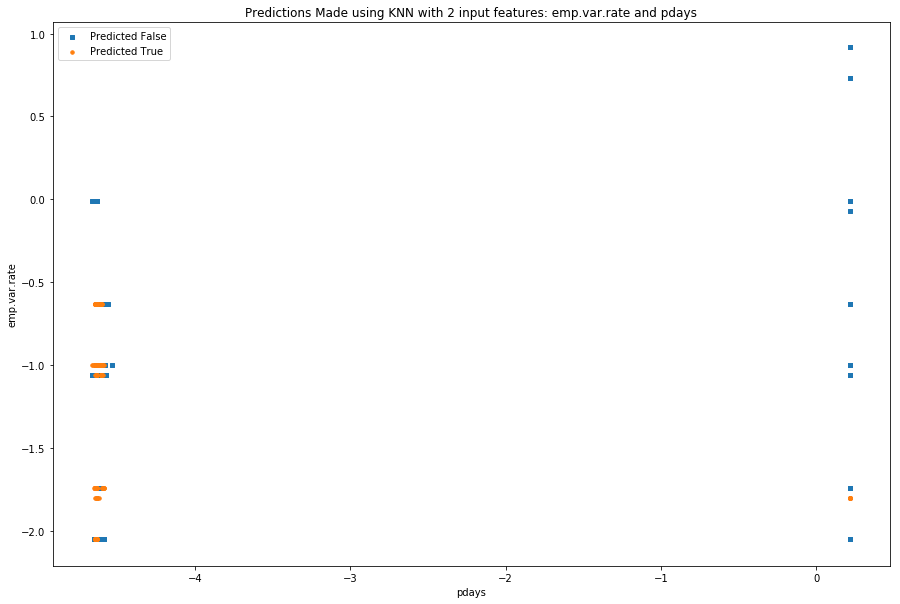

In [18]:
np.random.seed(150)
X_train, X_test, y_train, y_test = train_test_split(data_numeric_zscore[['pdays','emp.var.rate']].values, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

fig, ax = plt.subplots(figsize=(15,10))
for c in [0,1]:
    shape = ['s', 'o']
    ax.scatter(X_test[:,0][y_pred==c], X_test[:,1][y_pred==c], marker=shape[c], s=12)
ax.set_xlabel('pdays')
ax.set_ylabel('emp.var.rate')
ax.legend(['Predicted False', 'Predicted True'])
ax.set_title('Predictions Made using KNN with 2 input features: emp.var.rate and pdays')
plt.show()

We can see that the perdictions made to be True have very similar grouping. The predicted false values are more spread out over the plot. 

### Worst Two Performing Features previous and emp.var.rate

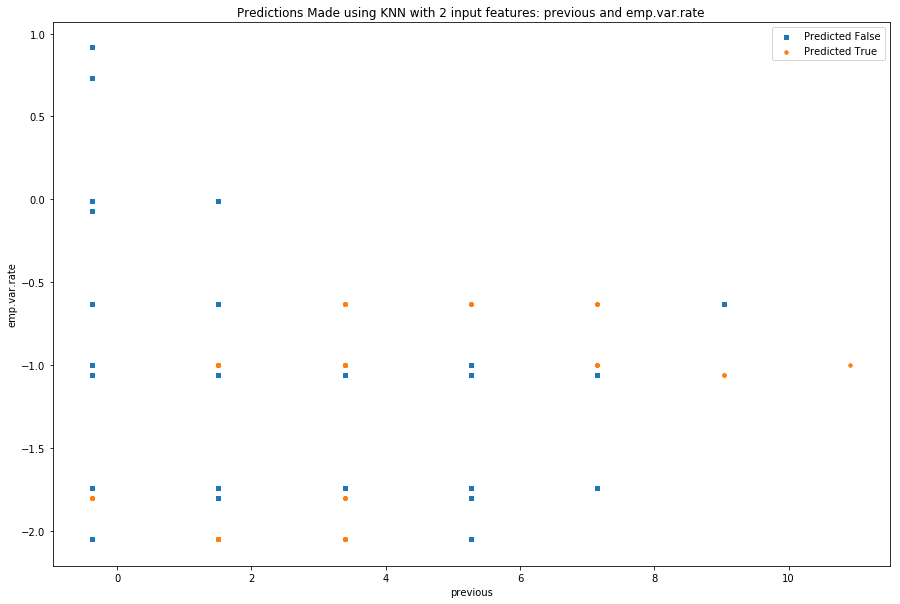

In [19]:
np.random.seed(150)
X_train, X_test, y_train, y_test = train_test_split(data_numeric_zscore[['previous','emp.var.rate']].values, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

fig, ax = plt.subplots(figsize=(15,10))
for c in [0,1]:
    shape = ['s', 'o']
    ax.scatter(X_test[:,0][y_pred==c], X_test[:,1][y_pred==c], marker=shape[c], s=12)
ax.set_xlabel('previous')
ax.set_ylabel('emp.var.rate')
ax.legend(['Predicted False', 'Predicted True'])
ax.set_title('Predictions Made using KNN with 2 input features: previous and emp.var.rate')
plt.show()

The two features taht perform the worst create almost a uniform spread of the data and don't indicate any trend or tendency to group together. 

# Support Vector Machine Models 

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_numeric_normalized, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
acc = clf.score(X_numeric_normalized, y)
print(acc)

0.8839700892296092


In [22]:
features_2D = list(itertools.combinations(features,2))
import random
random.seed(1231)
# pick 5 pairs of features at random and plot the prediction
r = random.sample(range(len(features_2D)), 5)
print(r)

[48, 32, 4, 53, 50]


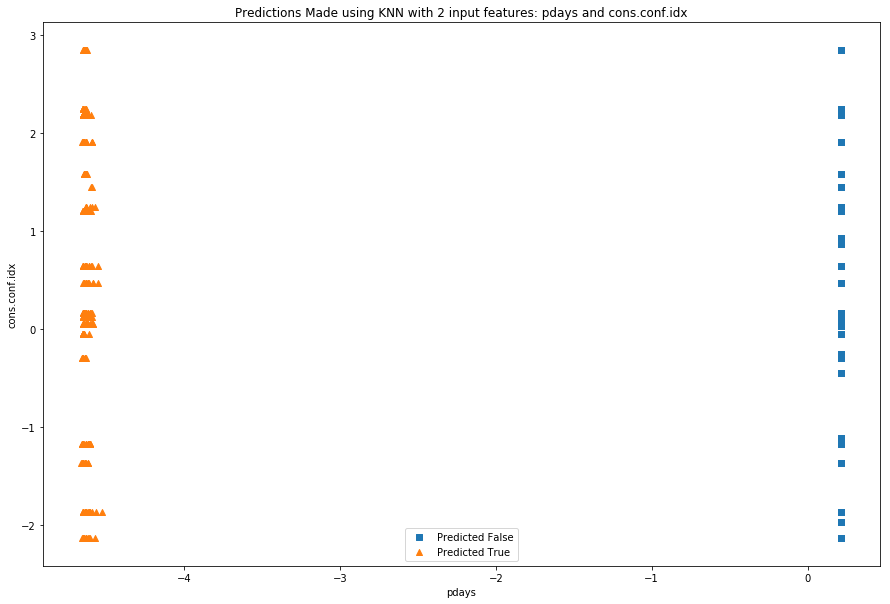

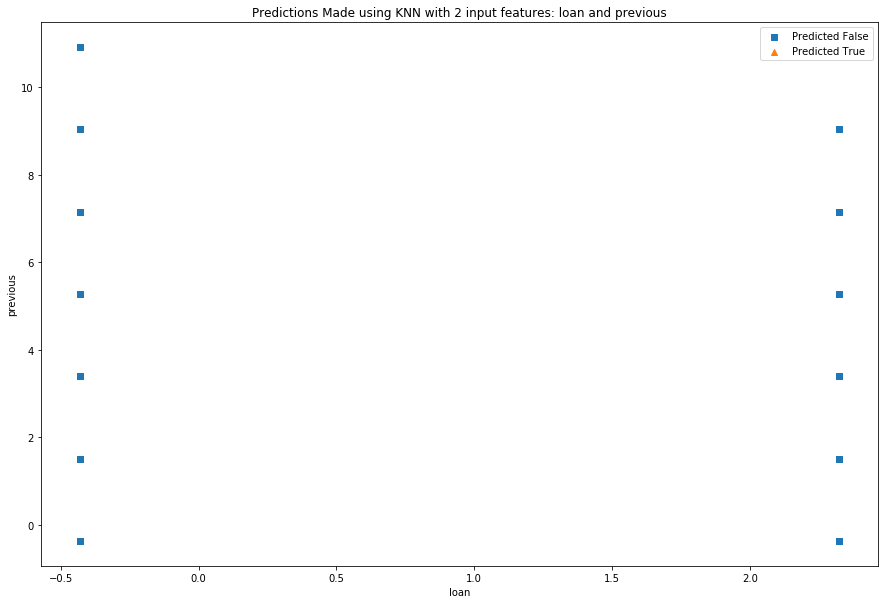

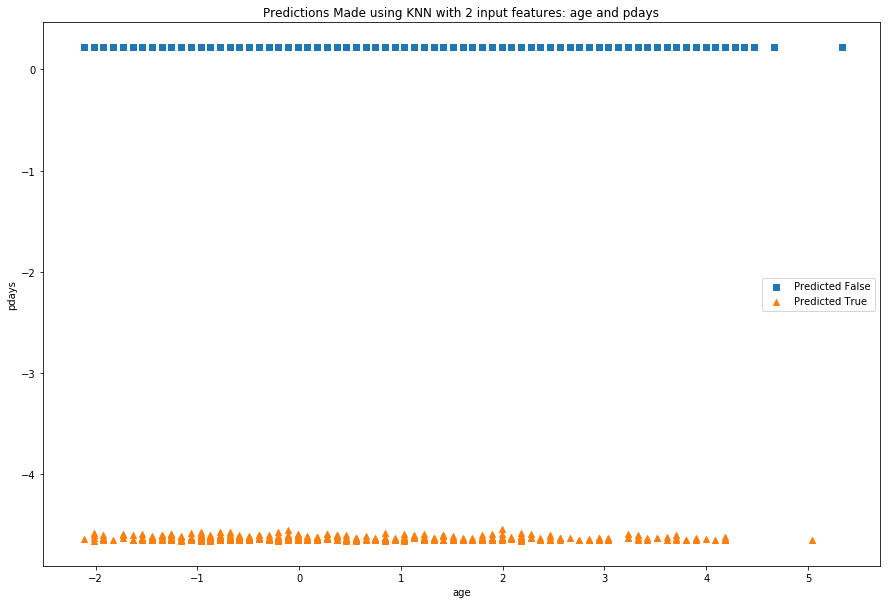

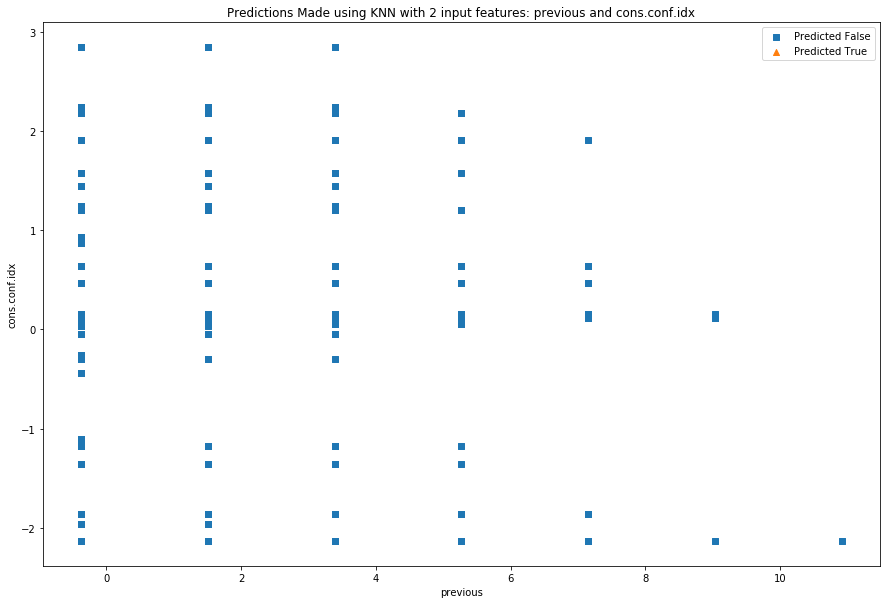

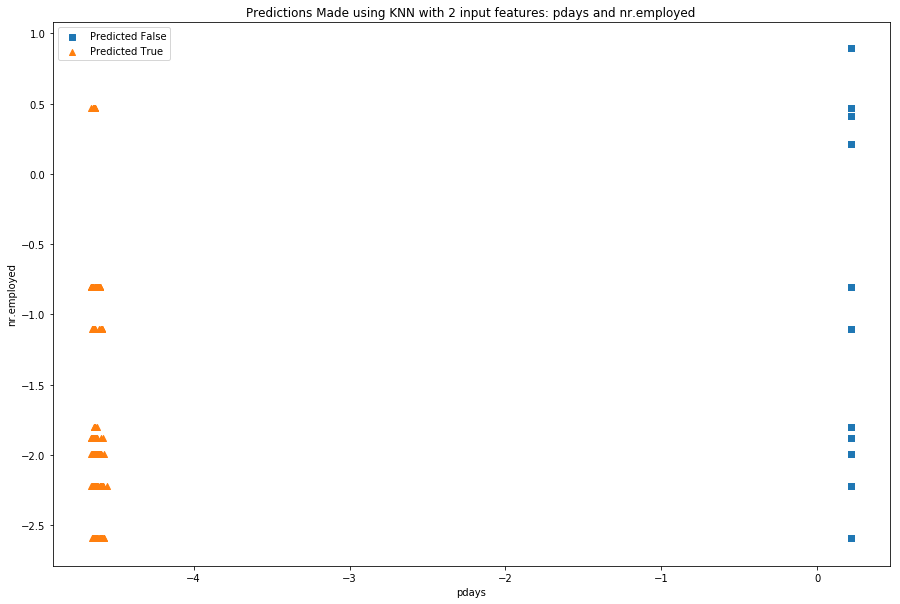

In [23]:
def create_plot(feature1,feature2, X, y_pred):
    fig, ax = plt.subplots(figsize=(15,10))
                
    for c in [0,1]:
        shape = ['s', '^']
        ax.scatter(X[:,0][y_pred==c], X[:,1][y_pred==c], marker=shape[c])
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.legend(['Predicted False', 'Predicted True'])
    ax.set_title(f'Predictions Made using KNN with 2 input features: {feature1} and {feature2}')
    plt.show()  


for idx in r:
    feature1, feature2 = features_2D[idx]
    X = data_numeric_zscore[[feature1, feature2]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = svm.SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    create_plot(feature1,feature2, X_test, y_pred)

# Results

Overall the performance between KNN and SVM is similar but the support vector machine performs better overall. This comes at a tradeoff as the support vector machine takes much longer to compute. We can see the previous 5 random plots, some pairs of features are grouped very distinctively. It must also be stated that the results of models trained with categorical data may perform poorly when only 2 features are considered. I kept these featuers in the set to explore the impact of the additional data on the overall predictive power of the models. More consideration and planning could have been done to scale the categorical features relative to their relevance. Also different standardization methods could yield different results and only z_score standardization was used in this anaylsis